Importacion de las librerias

In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

Carga, entrenamiento y normalizacion de los datos

In [2]:
fmnist = keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

4422102/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.

Compilación del modelo, entrenamiento con 10 epocas y gráfico el historial de entrenamiento

Epoch 1/10
1875/1875 [==============================] - 45s 23ms/step - loss: 0.4046 - accuracy: 0.8565
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2736 - accuracy: 0.9007
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2250 - accuracy: 0.9175
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1912 - accuracy: 0.9304
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1611 - accuracy: 0.9404
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1411 - accuracy: 0.9484
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1200 - accuracy: 0.9558
Epoch 8/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1009 - accuracy: 0.9631
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0877 - accuracy: 0.9675
Epoch 10/10
1875/1875 [==============================] - 35s 19m

<Axes: >

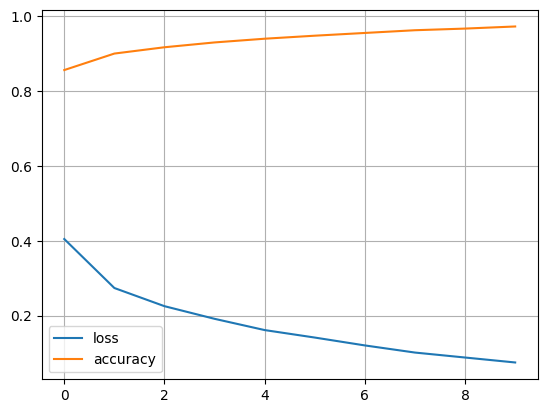

In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=10)

pd.DataFrame(history.history).plot(grid=True)

Evaluacion del modelo

In [4]:
loss, accuracy = model.evaluate(training_images, training_labels)
print("Perdida en el conjunto de entranamiento: ", loss)
print("Precisión en el conjunto de entrenamiento", accuracy)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
loss2, accuracy2 = model.evaluate(test_images, test_labels)
print("Perdida en el conjunto de prueba: ", loss2)
print("Precisión en el conjunto de pruebas", accuracy2)

1875/1875 [==============================] - 11s 5ms/step - loss: 0.0622 - accuracy: 0.9776
Perdida en el conjunto de entranamiento:  0.06215270608663559
Precisión en el conjunto de entrenamiento 0.9775999784469604
--------------------------------------------------------------
--------------------------------------------------------------
313/313 [==============================] - 2s 7ms/step - loss: 0.3284 - accuracy: 0.9115
Perdida en el conjunto de prueba:  0.3283674120903015
Precisión en el conjunto de pruebas 0.9114999771118164


Predicción en una imagen especifica

In [5]:
index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification: {classification.reshape(-1,1)}')

Label: 2
1/1 [==============================] - 0s 90ms/step
Classification: [[1.8451108e-05]
 [9.6824296e-17]
 [9.9998152e-01]
 [5.5465710e-10]
 [9.5434127e-10]
 [5.2779843e-15]
 [9.6054338e-09]
 [6.8772994e-17]
 [1.0972169e-17]
 [3.6391963e-17]]


Visualización de las convoluciones y Pooling

In [7]:
print(test_labels[:30])

first_image = 3
second_image = 6
third_image = 0
print("Imagenes selecionadas:")
print(test_labels[first_image])
print(test_labels[second_image])
print(test_labels[third_image])


[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3]
Imagenes selecionadas:
1
4
9


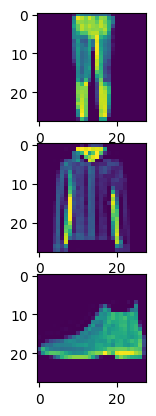

In [8]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[first_image])
axarr[1].imshow(test_images[second_image])
axarr[2].imshow(test_images[third_image])

1/1 [==============================] - 0s 22ms/step


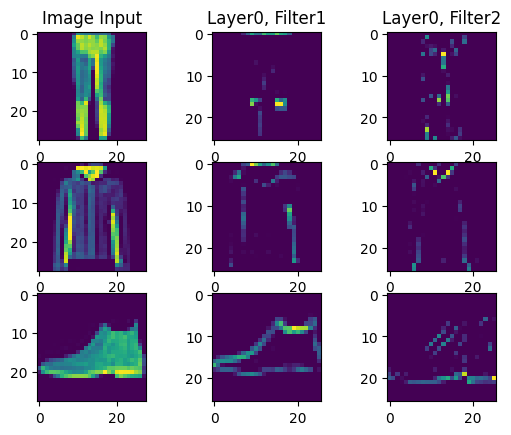

In [9]:
layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

f, axarr = plt.subplots(3,3)
axarr[0, 0].set_title("Image Input")
axarr[0, 0].imshow(test_images[first_image])
f1 = activation_model.predict(test_images[first_image].reshape(1, 28, 28, 1))[layer]
axarr[0, 1].set_title("Layer"+str(layer)+", Filter1")
axarr[0, 1].imshow(f1[0, : , : , filter1])
axarr[0, 2].set_title("Layer"+str(layer)+", Filter2")
axarr[0, 2].imshow(f1[0, : , : , filter2])

axarr[1, 0].imshow(test_images[second_image])
f2 = activation_model.predict(test_images[second_image].reshape(1, 28, 28, 1))[layer]
axarr[1, 1].imshow(f2[0, : , : , filter1])
axarr[1, 2].imshow(f2[0, : , : , filter2])

axarr[2, 0].imshow(test_images[third_image])
f3 = activation_model.predict(test_images[third_image].reshape(1, 28, 28, 1))[layer]
axarr[2, 1].imshow(f3[0, : , : , filter1])
axarr[2, 2].imshow(f3[0, : , : , filter2])


Cambio de seleción de imagenes

In [11]:
print(test_labels[:30])

first_image = 1
second_image = 4
third_image = 8
print("Imagenes selecionadas:")
print(test_labels[first_image])
print(test_labels[second_image])
print(test_labels[third_image])


[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3]
Imagenes selecionadas:
2
6
5


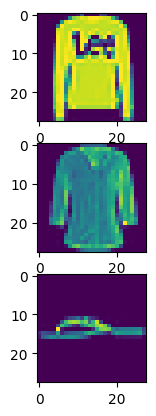

In [12]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[first_image])
axarr[1].imshow(test_images[second_image])
axarr[2].imshow(test_images[third_image])

1/1 [==============================] - 0s 22ms/step


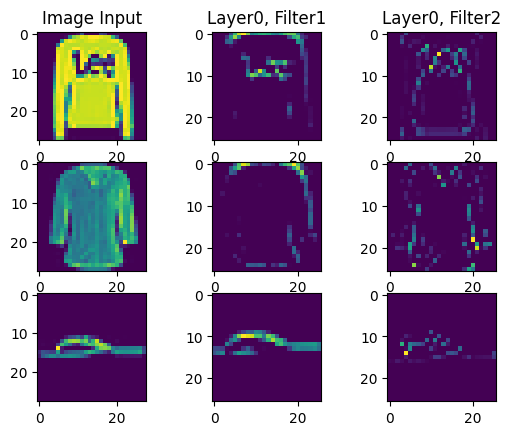

In [13]:
f, axarr = plt.subplots(3,3)
axarr[0, 0].set_title("Image Input")
axarr[0, 0].imshow(test_images[first_image])
f1 = activation_model.predict(test_images[first_image].reshape(1, 28, 28, 1))[layer]
axarr[0, 1].set_title("Layer"+str(layer)+", Filter1")
axarr[0, 1].imshow(f1[0, : , : , filter1])
axarr[0, 2].set_title("Layer"+str(layer)+", Filter2")
axarr[0, 2].imshow(f1[0, : , : , filter2])

axarr[1, 0].imshow(test_images[second_image])
f2 = activation_model.predict(test_images[second_image].reshape(1, 28, 28, 1))[layer]
axarr[1, 1].imshow(f2[0, : , : , filter1])
axarr[1, 2].imshow(f2[0, : , : , filter2])

axarr[2, 0].imshow(test_images[third_image])
f3 = activation_model.predict(test_images[third_image].reshape(1, 28, 28, 1))[layer]
axarr[2, 1].imshow(f3[0, : , : , filter1])
axarr[2, 2].imshow(f3[0, : , : , filter2])